## Logistic Regression, Gradient Descent

In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

### Goals:- 
    In this lab we will, 
        update gradient descent for logistic regression
        explore gradient descent on a familiar dataset

In [2]:
# Dataset

x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

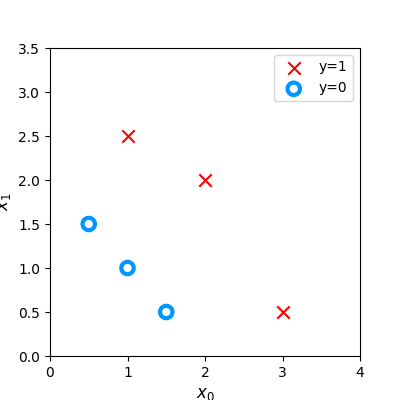

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (4,4))
plot_data(x_train, y_train, ax)

ax.axis([0,4,0,3.5])
ax.set_ylabel("$x_1$", fontsize = 12)
ax.set_xlabel("$x_0$", fontsize = 12)
plt.show()

## Logistic Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


### Gradient Descent Implementation
The gradient descent algorithm implementation has two components: 
- The loop implementing equation (1) above. This is `gradient_descent` below and is generally provided to you in optional and practice labs.
- The calculation of the current gradient, equations (2,3) above. This is `compute_gradient_logistic` below. You will be asked to implement this week's practice lab.

#### Calculating the Gradient, Code Description
Implements equation (2),(3) above for all $w_j$ and $b$.
There are many ways to implement this. Outlined below is this:
- initialize variables to accumulate `dj_dw` and `dj_db`
- for each example
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in this example,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- divide `dj_db` and `dj_dw` by total number of examples (m)
- note that $\mathbf{x}^{(i)}$ in numpy `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`

In [4]:
def compute_gradient_logistic(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = sigmoid(z_i)
        err_i = (f_wb_i - y[i])
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]
        dj_db += err_i
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [5]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp}" )

dj_db: [0.5 0.5]
dj_dw: 0.49861806546328574


### Gradient descent

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 100000:
            J_history.append(compute_cost_logistic(x, y, w, b))
            
        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
    
    return w, b, J_history

In [7]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alpha, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870456
Iteration 2000: Cost 0.08460064176930081
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.042907594216820076
Iteration 5000: Cost 0.034338477298845684
Iteration 6000: Cost 0.028603798022120097
Iteration 7000: Cost 0.024501569608793
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114

updated parameters: w:[5.28 5.08], b:-14.222409982019837


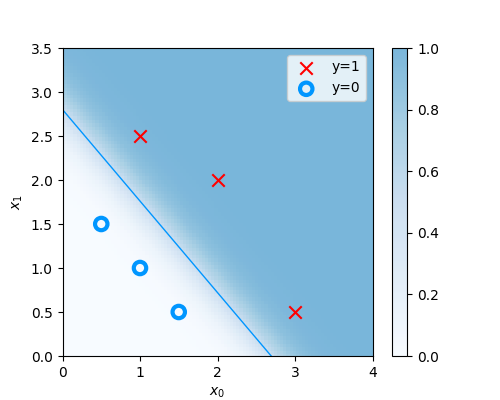

In [8]:
fig, ax = plt.subplots(1,1, figsize = (5,4))
# Plot the probability
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(x_train, y_train, ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0, x0], [x1, 0], c = dlc["dlblue"], lw = 1)
plt.show()

### Another Dataset

In [9]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0, 0, 0, 1, 1, 1])

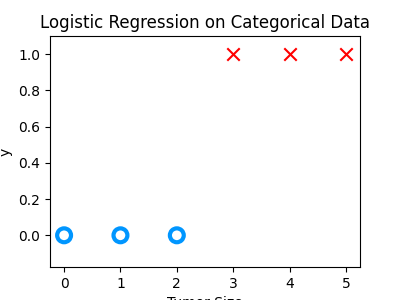

In [10]:
fig, ax = plt.subplots(1,1, figsize = (4,3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

In the plot below, try:
- changing $w$ and $b$ by clicking within the contour plot on the upper right.
    - changes may take a second or two
    - note the changing value of cost on the upper left plot.
    - note the cost is accumulated by a loss on each example (vertical dotted lines)
- run gradient descent by clicking the orange button.
    - note the steadily decreasing cost (contour and cost plot are in log(cost) 
    - clicking in the contour plot will reset the model for a new run
- to reset the plot, rerun the cell

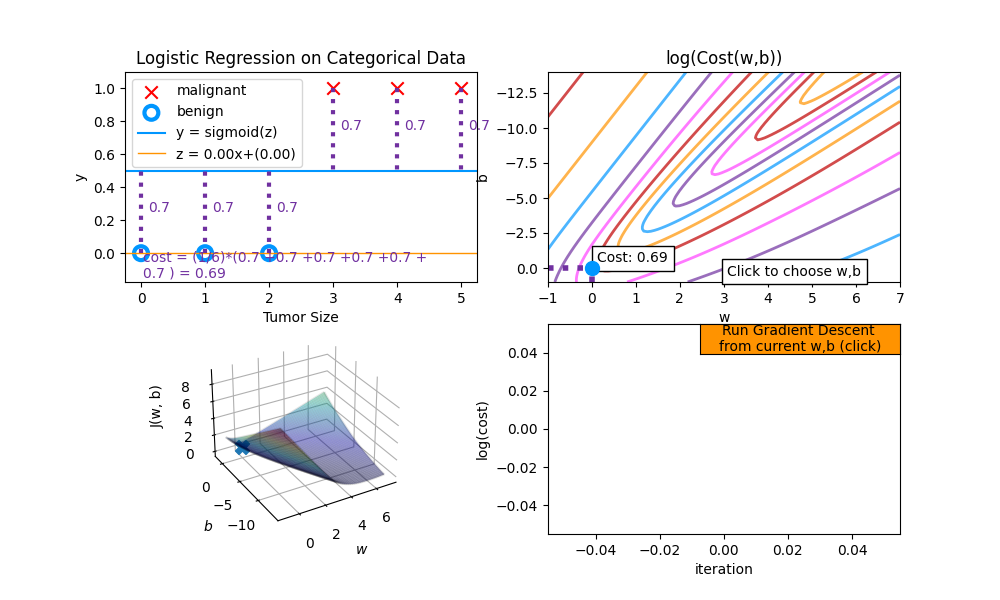

In [11]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic(x_train, y_train, w_range, b_range)